# Customer Segmentation 

✅ Data Loaded Successfully!

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

🔍 Checking for Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

✅ Duplicates removed.
✅ Annual Income (k$): Removed 2 outliers.
✅ Spending Score (1-100): Removed 0 outliers.

📊 Performing EDA...


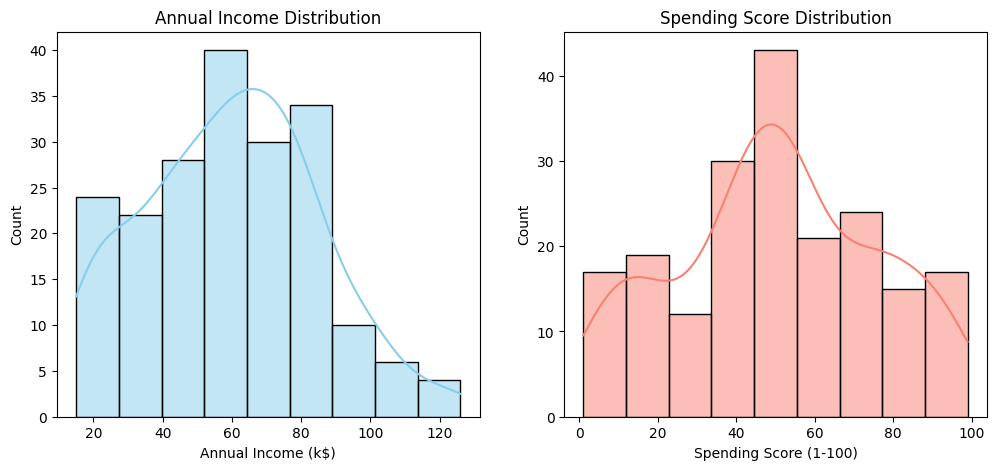


✅ Model Created Successfully! Silhouette Score: 0.437


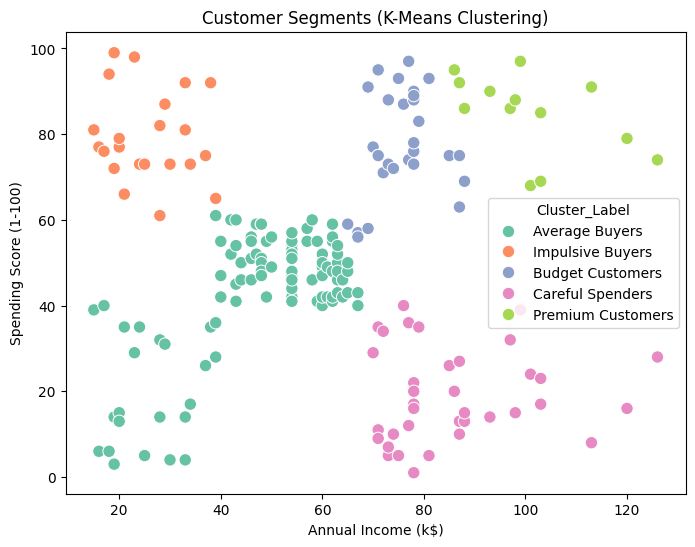

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ----------------------------------------
# Function 1: Data Loading and Cleaning
# ----------------------------------------
def load_and_clean_data(path):
    try:
        data = pd.read_csv(path)
        print("✅ Data Loaded Successfully!\n")
        print(data.head())

        # Check for missing values
        print("\n🔍 Checking for Missing Values:")
        print(data.isnull().sum())

        # Handle duplicates
        data = data.drop_duplicates()
        print("\n✅ Duplicates removed.")

        return data
    except FileNotFoundError:
        print("❌ Error: File not found. Please check the file path.")
    except Exception as e:
        print(f"⚠️ Unexpected error while loading data: {e}")

# ----------------------------------------
# Function 2: Outlier Detection (IQR Method)
# ----------------------------------------
def remove_outliers_iqr(data, columns):
    try:
        for col in columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            before = data.shape[0]
            data = data[(data[col] >= lower) & (data[col] <= upper)]
            after = data.shape[0]
            print(f"✅ {col}: Removed {before - after} outliers.")
        return data
    except KeyError as e:
        print(f"❌ Column not found: {e}")
    except Exception as e:
        print(f"⚠️ Error during outlier removal: {e}")

# ----------------------------------------
# Function 3: EDA
# ----------------------------------------
def perform_eda(data):
    try:
        print("\n📊 Performing EDA...")
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        sns.histplot(data['Annual Income (k$)'], kde=True, color='skyblue')
        plt.title("Annual Income Distribution")

        plt.subplot(1,2,2)
        sns.histplot(data['Spending Score (1-100)'], kde=True, color='salmon')
        plt.title("Spending Score Distribution")
        plt.show()
    except Exception as e:
        print(f"⚠️ EDA error: {e}")

# ----------------------------------------
# Function 4: Clustering
# ----------------------------------------
def perform_clustering(data, n_clusters=5):
    try:
        X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        data['Cluster'] = kmeans.fit_predict(X_scaled)

        score = silhouette_score(X_scaled, data['Cluster'])
        print(f"\n✅ Model Created Successfully! Silhouette Score: {score:.3f}")

        return data, kmeans, X_scaled
    except Exception as e:
        print(f"⚠️ Error during clustering: {e}")

# ----------------------------------------
# Function 5: Visualization
# ----------------------------------------
def visualize_clusters(data, X_scaled):
    try:
        cluster_labels = {
            0: "Average Buyers",
            1: "Premium Customers",
            2: "Impulsive Buyers",
            3: "Careful Spenders",
            4: "Budget Customers"
        }

        data["Cluster_Label"] = data["Cluster"].map(cluster_labels)

        plt.figure(figsize=(8,6))
        sns.scatterplot(
            x=data["Annual Income (k$)"],
            y=data["Spending Score (1-100)"],
            hue=data["Cluster_Label"],
            palette="Set2",
            s=80
        )
        plt.title("Customer Segments (K-Means Clustering)")
        plt.xlabel("Annual Income (k$)")
        plt.ylabel("Spending Score (1-100)")
        plt.show()
    except Exception as e:
        print(f"⚠️ Error in visualization: {e}")

# ----------------------------------------
# Main Function
# ----------------------------------------
def main():
    path = r"C:\GuviProject2\Mall_Customers.csv"
    data = load_and_clean_data(path)
    if data is not None:
        data = remove_outliers_iqr(data, ["Annual Income (k$)", "Spending Score (1-100)"])
        perform_eda(data)
        result = perform_clustering(data)
        if result:
            data, model, X_scaled = result
            visualize_clusters(data, X_scaled)

if __name__ == "__main__":
    main()
